

# Import libraries.


In [ ]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import glob
import random
import os
import cv2
import pickle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#tesor fow & keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D
import os
from keras.applications.vgg16 import VGG16
from sklearn.ensemble import RandomForestClassifier
#cnn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 42
np.random.seed =seed


# Import Data 
*   Train images
*   Masked images



In [ ]:
# start load each masked images & train images we found masked
# image ended by _mask that is the separator to define images

In [ ]:
mask_files = glob.glob('/content/drive/MyDrive/datasets/brain_tumer.zip (Unzipped Files)/lgg-mri-segmentation/kaggle_3m/*/*_mask*')


In [ ]:
#get trained files
train_files = []
def load_train_files() :
    for i in tqdm(mask_files):
        image = i.replace('_mask','')
        train_files.append(image)

In [ ]:
load_train_files()

100%|██████████| 3929/3929 [00:00<00:00, 1321525.29it/s]


100%|██████████| 10/10 [00:02<00:00,  4.93it/s]


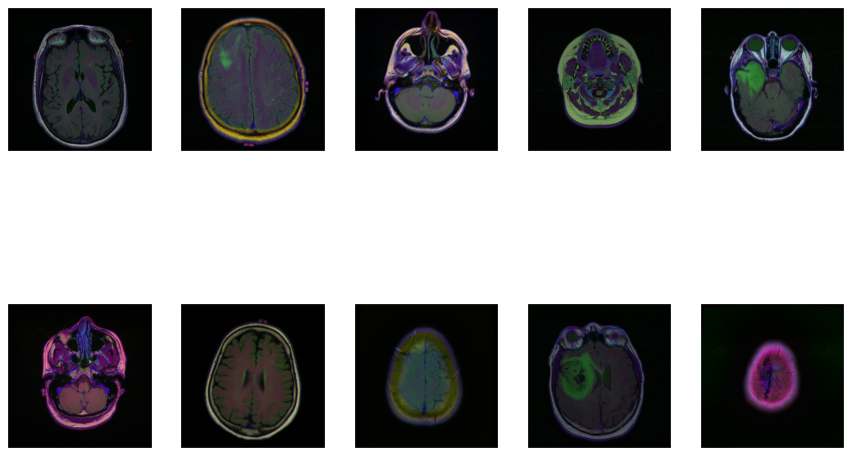

In [ ]:
plt.figure(figsize=(15,10))
for i in tqdm(range(10) ) :
    images = random.choice(train_files)
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid([])
    img = mpimg.imread(images)
    plt.imshow(img)

100%|██████████| 10/10 [00:00<00:00, 44.86it/s]


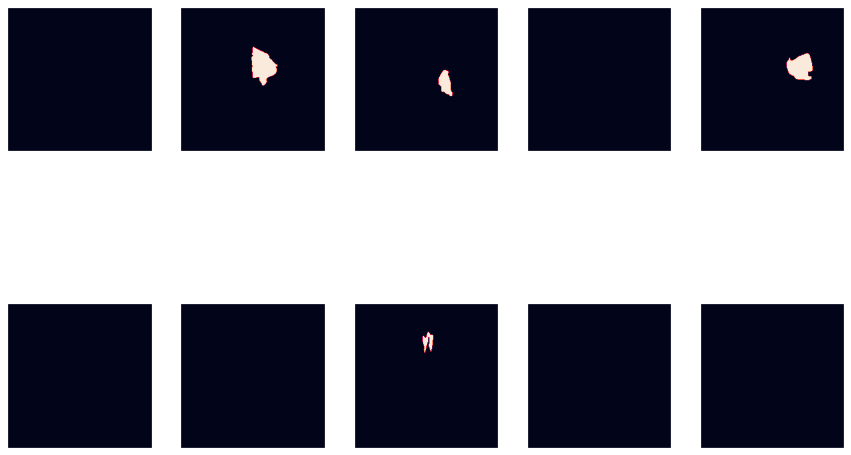

In [ ]:
plt.figure(figsize=(15,10))
for i in tqdm(range(10)) :
    images = random.choice(mask_files)
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid([])
    img = mpimg.imread(images)
    plt.imshow(img)

In [ ]:
#here load all traind image and recorde it inside array
tarin_images=[]
def load_train_images():
    for images in tqdm(train_files) :
        image = cv2.imread(images,cv2.IMREAD_COLOR)
        image = cv2.resize(image,(128,128))
        image =cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        tarin_images.append(image)

In [ ]:
#here load all masked image and recorde it inside array
masked_=[]
def load_masked_images():
    for masked in tqdm(mask_files) :
        mask = cv2.imread(masked,0)
        mask = cv2.resize(mask,(128,128))
        masked_.append(mask)


In [ ]:
load_train_images()

100%|██████████| 3929/3929 [08:30<00:00,  7.70it/s]


In [ ]:
load_masked_images()

100%|██████████| 3929/3929 [07:04<00:00,  9.25it/s]


In [ ]:
#here we havent much more memory to tarin 3929 so we need to reduce number of images to be able to train it
train_images_reduced =tarin_images[:2000]
train_masks_reduced =masked_[:2000]
print(len(train_images_reduced))
print(len(train_masks_reduced))

2000
2000


In [ ]:
#start convert images to array
train_images  = np.array(train_images_reduced)
masked_images = np.array(train_masks_reduced)

In [ ]:
print('Train  Images  Shape  Is :{}'.format(train_images.shape))
print('Masked Images  Shape  Is :{}'.format(masked_images.shape))

Train  Images  Shape  Is :(2000, 128, 128, 3)
Masked Images  Shape  Is :(2000, 128, 128)


In [ ]:
x_train =  train_images
y_train = masked_images
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# VGG16 Model

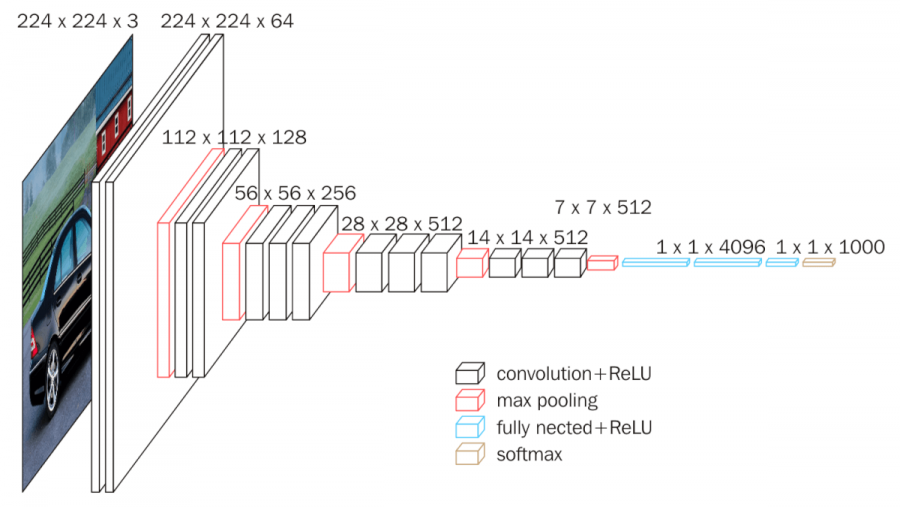

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/datasets/vgg16-1-e1542731207177.png")

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

# Handel VGG model 

1. chose VGG model Layer to be addaptive with  our data 
2. load VGG Weights  
3. removing dense layer from model




In [ ]:
#here we will load imagenet weight & remove any dense layer from model
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
from keras.engine.base_layer import Layer
#remove dens layer
for layer in vgg_model.layers:
	layer.trainable = False
vgg_model.summary()    

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# remember shape of x_train is (3929, 128, 128, 3) which is copatable with layer block1_conv2 
new_model = Model(inputs=vgg_model.input,outputs=vgg_model.get_layer('block1_conv2').output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


In [ ]:
#get all features
features = new_model.predict(x_train)

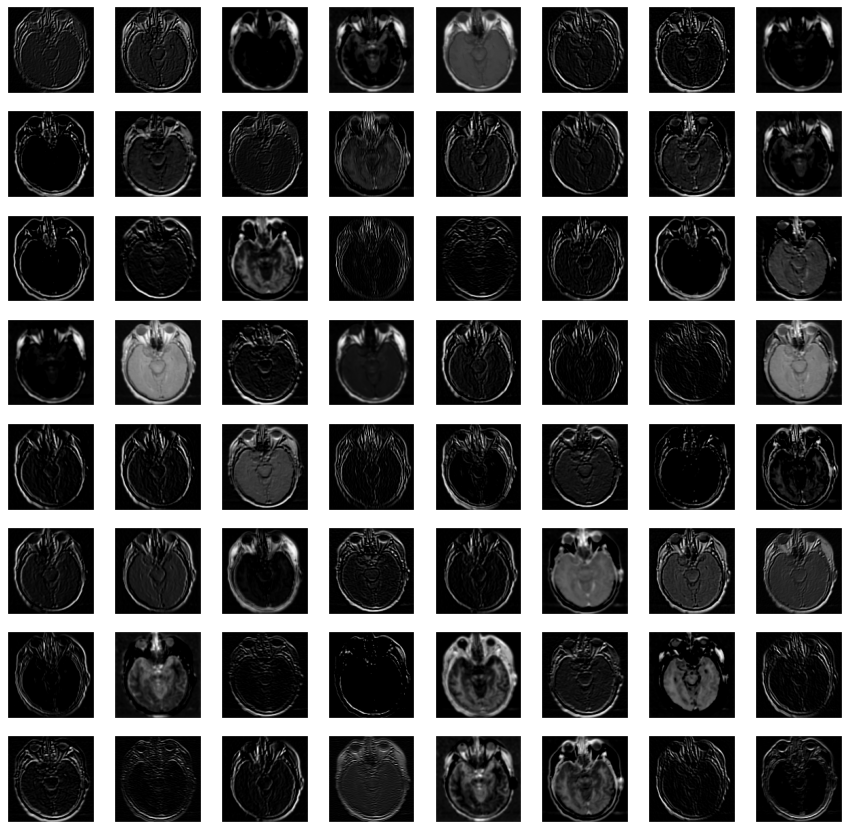

In [ ]:
plt.figure(figsize=(15,15))
square = 8
ix=1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(features[0,:,:,ix-1], cmap='gray')
        ix +=1
plt.show()

# handel data  with RandomForestClassifier

1.   convert shape of features and label to same shape of RandomForestClassifier
2.   convert x,y to random forest shape(x,y)
1.   create data frame to reject zero pixel 
2.   List item


In [ ]:
print('x  before reshapping  Is :{}'.format(x.shape))
x = features
#shape of random forest is (x,y)only
x = x.reshape(-1,x.shape[3])
y = y_train.reshape(-1)
print('x  Shape  Is :{}'.format(x.shape))
print('y  Shape  Is :{}'.format(y.shape))

x  before reshapping  Is :(2000, 128, 128, 64)
x  Shape  Is :(32768000, 64)
y  Shape  Is :(32768000,)


In [ ]:
#remove zero pixels befor training
df = pd.DataFrame(x)
df['label'] = y
print(df['label'].unique())
print(df['label'].value_counts())

[  0  64 255 191 128]
0      32420250
255      301794
128       20800
64        12999
191       12157
Name: label, dtype: int64


In [ ]:
df = df[df['label']!=0]
x_rf = df.drop(labels=['label'],axis=1)
y_rf = df['label']

In [ ]:
#call rf classifier
rf_model = RandomForestClassifier(n_estimators=50,random_state=42,verbose=True)
rf_model.fit(x_rf,y_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomForestClassifier(n_estimators=50, random_state=42, verbose=True)

In [ ]:
import pickle
filename = '/content/drive/MyDrive/model_result/vgg_segmentaion/RF_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

# predected model & test result

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


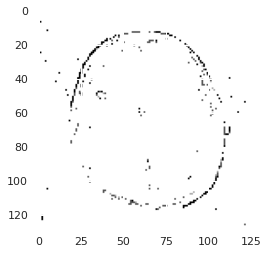

In [ ]:
saved_model = pickle.load(open('/content/drive/MyDrive/model_result/vgg_segmentaion/RF_model.sav', 'rb'))
test_img = cv2.imread('/content/drive/MyDrive/datasets/brain_tumer.zip (Unzipped Files)/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_18.tif', cv2.IMREAD_COLOR)       
#test_img = cv2.imread('/content/drive/MyDrive/datasets/brain_tumer.zip (Unzipped Files)/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_10_mask.tif', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
#call vgg model
test_image_feature = new_model.predict(test_img)
#reshape image 
test_image_feature = test_image_feature.reshape(-1,test_image_feature.shape[3])
#start predect masked image
new_predection = saved_model.predict(test_image_feature)
new_predicted_image = new_predection.reshape(128,128)
plt.imshow(new_predicted_image, cmap='gray')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


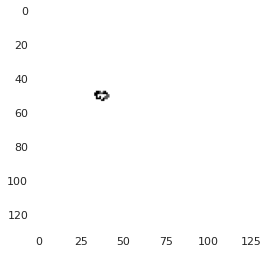

In [ ]:
saved_model = pickle.load(open('/content/drive/MyDrive/model_result/vgg_segmentaion/RF_model.sav', 'rb'))
test_img = cv2.imread('/content/drive/MyDrive/datasets/brain_tumer.zip (Unzipped Files)/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_18_mask.tif', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
#call vgg model
test_image_feature = new_model.predict(test_img)
#reshape image 
test_image_feature = test_image_feature.reshape(-1,test_image_feature.shape[3])
#start predect masked image
new_predection = saved_model.predict(test_image_feature)
new_predicted_image = new_predection.reshape(128,128)

plt.imshow(new_predicted_image, cmap='gray')
plt.show()